In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots()


Text(0.5, 0.98, 'Distribution')

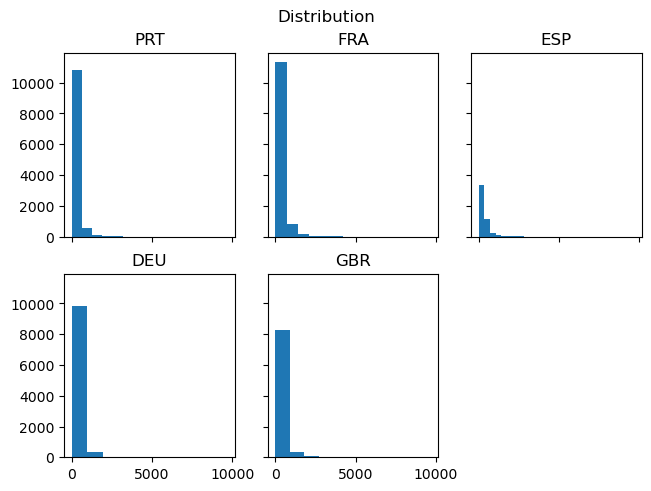

In [3]:
fig, ax = plt.subplots(2, 3, constrained_layout = True, sharex= all, sharey = all)

ax[0][0].hist(hotels.query('Nationality == "PRT" and RoomNights < 15').loc[:, ['LodgingRevenue']])
ax[0][0].set_title('PRT')

ax[0][1].hist(hotels.query('Nationality == "FRA" and RoomNights < 15').loc[:, ['LodgingRevenue']])
ax[0][1].set_title('FRA')

ax[1][0].hist(hotels.query('Nationality == "DEU" and RoomNights < 15').loc[:, ['LodgingRevenue']])
ax[1][0].set_title('DEU')

ax[1][1].hist(hotels.query('Nationality == "GBR" and RoomNights < 15').loc[:, ['LodgingRevenue']])
ax[1][1].set_title('GBR')

ax[0][2].hist(hotels.query('Nationality == "ESP" and RoomNights < 15').loc[:, ['LodgingRevenue']])
ax[0][2].set_title('ESP')

ax[1, 2].set_axis_off()

fig.suptitle('Distribution')

# Assignment 2: GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [87]:
hotels = hotels.assign(
    date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
)


hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,total_revenue,date
date,,,,,,,,,,,,,,,,,,,,,
2018-08-03,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,476.3,2018-08-03
2016-01-01,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,333.0,2016-01-01
2016-01-01,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2016-01-01
2016-01-01,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,300.0,2016-01-01
2016-01-01,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2016-01-01


In [91]:
# Prep Data For Line Chart
line = hotels.resample('M').agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})

line

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


In [47]:
# Prep Data For Bar Chart
bar = hotels.groupby('Nationality')[['total_revenue']].sum()
bar = bar.sort_values('total_revenue', ascending = False).head()
bar

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


In [57]:
target = [33, 67]
labels = ['', '']

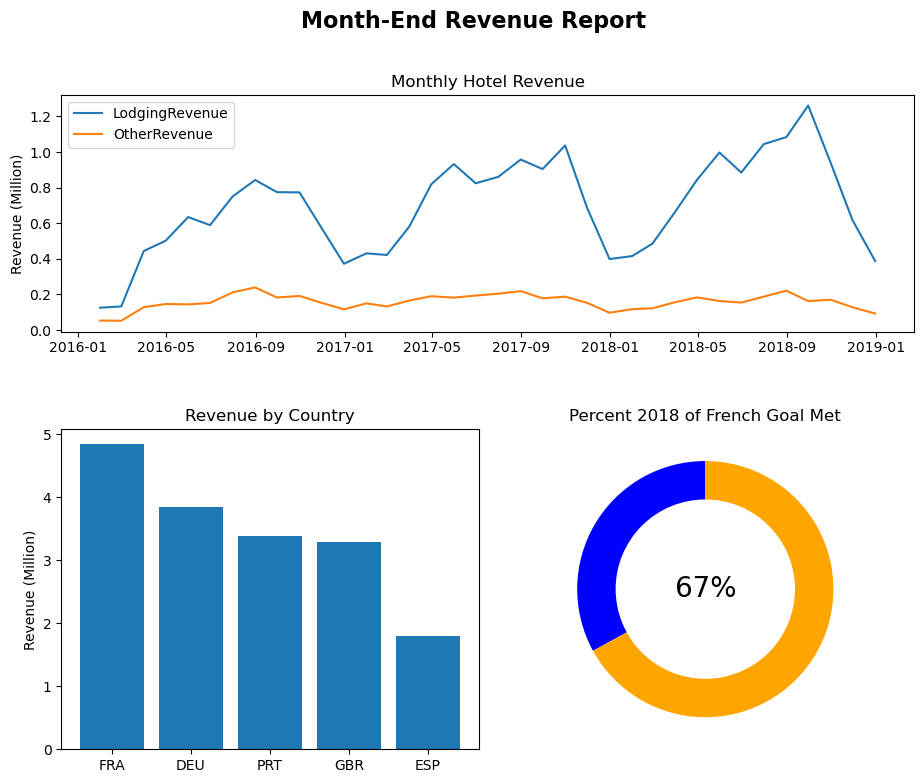

In [110]:
# Build GridSpec
fig = plt.figure(figsize = (11, 8.5))
fig.suptitle('Month-End Revenue Report', fontsize = 16, fontweight='bold')

grid = GridSpec(8,8, figure = fig)

ax1 = fig.add_subplot(grid[0:3, 0:])
ax1.plot(
    line.index,
    line.values/1000000,
    label = line.columns
)
ax1.legend()
ax1.set_ylabel('Revenue (Million)')
ax1.set_xlabel('')
ax1.set_title('Monthly Hotel Revenue')

ax2 = fig.add_subplot(grid[4:, 0:4])
ax2.bar(
    bar.index,
    bar['total_revenue']/1000000
)

ax2.set_ylabel('Revenue (Million)')
ax2.set_xlabel('')
ax2.set_title('Revenue by Country')

ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie(
    x = target,
    startangle = 90,
    labels = labels,
    autopct = '',
    colors = ['blue', 'orange'],
)

#brazil_percentage = (brazil_2018.loc['Brazil', '2018'] / brazil_2018['2018'].sum()) * 100

# Add the percentage at the center of the plot
ax3.text(0, 0, f'{target[1]:.0f}%', color='black', fontsize=20, ha='center', va='center')
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax3.set_title('Percent 2018 of French Goal Met')


plt.show()

# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

In [125]:
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
bar_colors = ['#0055A4', '#000000', '#046A38', '#C8102E', '#FFD100']
pie_colors = ['#FFF', '#0055A4']

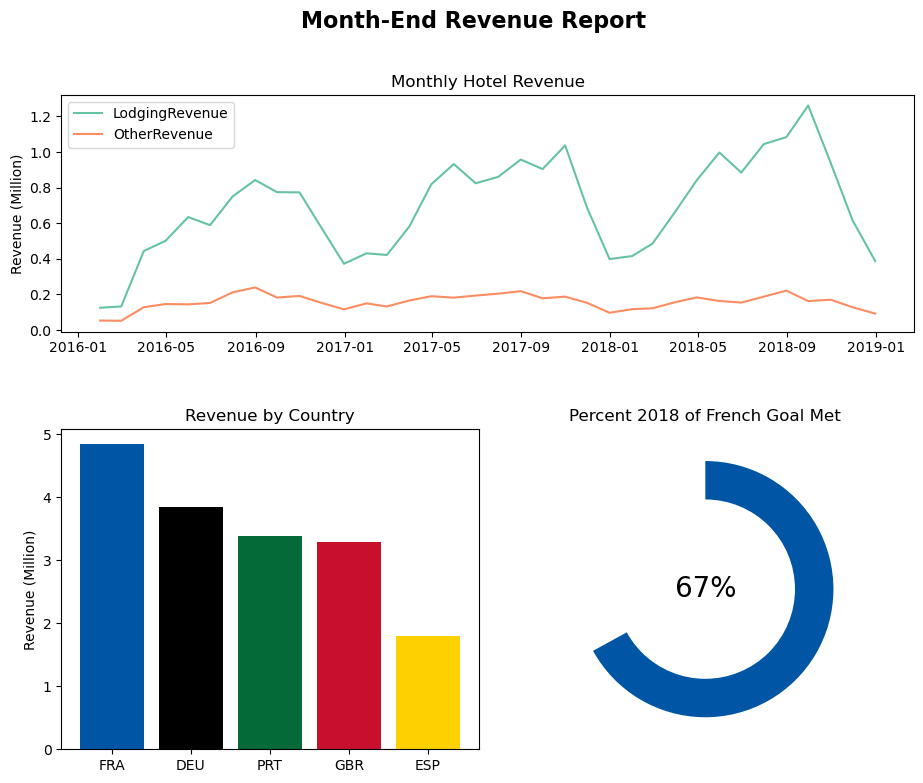

In [126]:
# Build GridSpec
fig = plt.figure(figsize = (11, 8.5))
fig.suptitle('Month-End Revenue Report', fontsize = 16, fontweight='bold')

grid = GridSpec(8,8, figure = fig)

ax1 = fig.add_subplot(grid[0:3, 0:])
ax1.plot(
    line.index,
    line.values/1000000,
    label = line.columns
)
ax1.legend()
ax1.set_ylabel('Revenue (Million)')
ax1.set_xlabel('')
ax1.set_title('Monthly Hotel Revenue')

ax2 = fig.add_subplot(grid[4:, 0:4])
ax2.bar(
    bar.index,
    bar['total_revenue']/1000000,
    color = bar_colors
)

ax2.set_ylabel('Revenue (Million)')
ax2.set_xlabel('')
ax2.set_title('Revenue by Country')

ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie(
    x = target,
    startangle = 90,
    labels = labels,
    autopct = '',
    colors = pie_colors,
)

#brazil_percentage = (brazil_2018.loc['Brazil', '2018'] / brazil_2018['2018'].sum()) * 100

# Add the percentage at the center of the plot
ax3.text(0, 0, f'{target[1]:.0f}%', color='black', fontsize=20, ha='center', va='center')
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax3.set_title('Percent 2018 of French Goal Met')


plt.show()

# Assignment 4: Stylesheets
* Apply a stylesheet to the above code

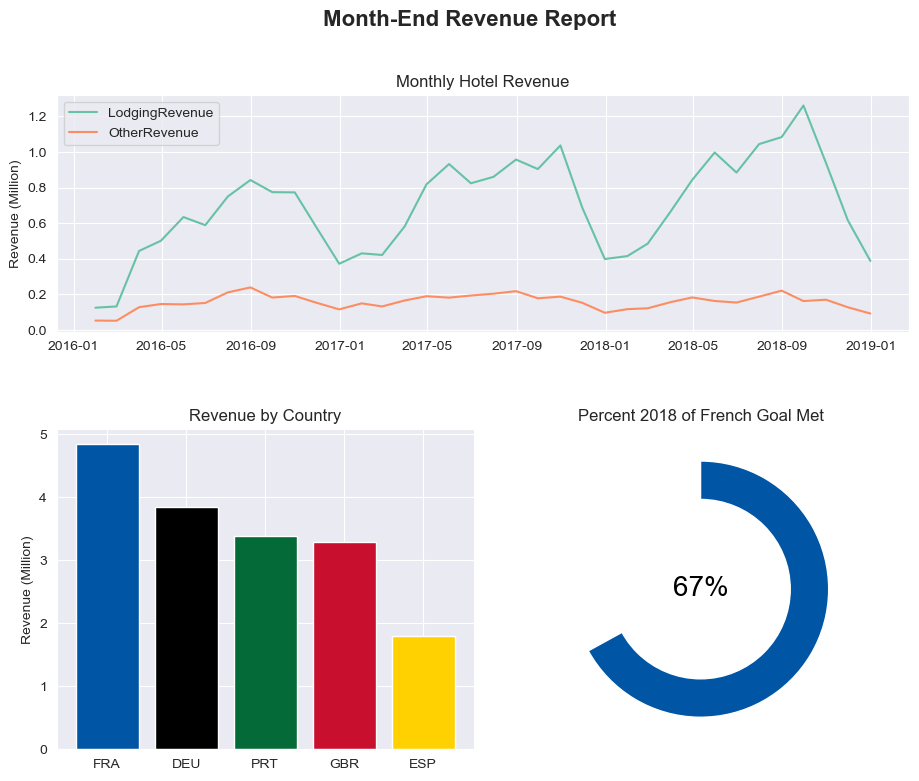

In [127]:
import seaborn as sns

sns.set_style('darkgrid')

fig = plt.figure(figsize = (11, 8.5))
fig.suptitle('Month-End Revenue Report', fontsize = 16, fontweight='bold')

grid = GridSpec(8,8, figure = fig)

ax1 = fig.add_subplot(grid[0:3, 0:])
ax1.plot(
    line.index,
    line.values/1000000,
    label = line.columns
)
ax1.legend()
ax1.set_ylabel('Revenue (Million)')
ax1.set_xlabel('')
ax1.set_title('Monthly Hotel Revenue')

ax2 = fig.add_subplot(grid[4:, 0:4])
ax2.bar(
    bar.index,
    bar['total_revenue']/1000000,
    color = bar_colors
)

ax2.set_ylabel('Revenue (Million)')
ax2.set_xlabel('')
ax2.set_title('Revenue by Country')

ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie(
    x = target,
    startangle = 90,
    labels = labels,
    autopct = '',
    colors = pie_colors,
)

#brazil_percentage = (brazil_2018.loc['Brazil', '2018'] / brazil_2018['2018'].sum()) * 100

# Add the percentage at the center of the plot
ax3.text(0, 0, f'{target[1]:.0f}%', color='black', fontsize=20, ha='center', va='center')
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax3.set_title('Percent 2018 of French Goal Met')


plt.show()